## 1. Data preprocessing and EDA:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import time as tm

In [2]:
df = pd.read_csv("Final_df.csv")
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318565 entries, 0 to 318564
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   time          318565 non-null  object 
 1   temperature   318565 non-null  float64
 2   soilMoisture  318565 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 7.3+ MB


,temperature,soilMoisture
count,318565.000000,318565.000000
mean,24.813514,99.399981
std,0.753247,0.605083
min,20.553129,79.000000
25%,24.090002,99.000000
50%,24.903046,99.000000
75%,25.374757,100.000000
max,26.788774,100.000000


In [3]:
df.head()

,time,temperature,soilMoisture
0,2025-11-12 09:08:00.248704936+00:00,23.008131,99
1,2025-11-12 09:08:02.764720638+00:00,23.008141,99
2,2025-11-12 09:08:07.681226269+00:00,23.035870,100
3,2025-11-12 09:08:12.481963698+00:00,23.058266,99
4,2025-11-12 09:08:17.397625407+00:00,23.055740,100


In [4]:
df.isnull().sum()

time            0
temperature     0
soilMoisture    0
dtype: int64

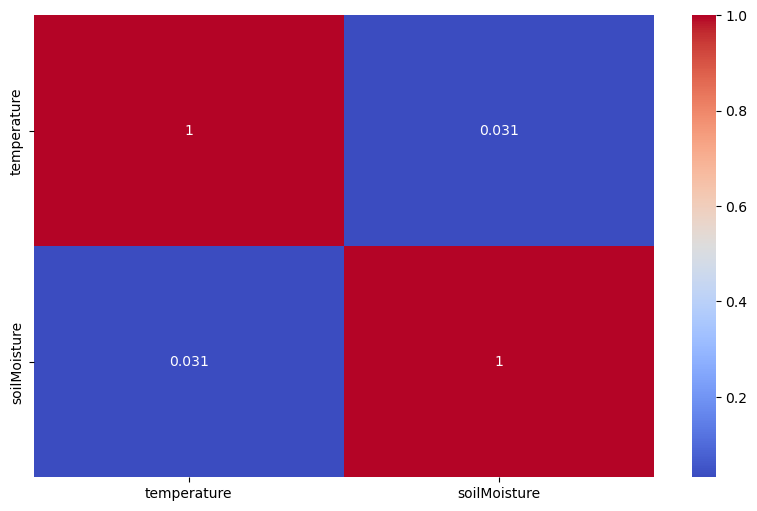

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1000x600 with 0 Axes>

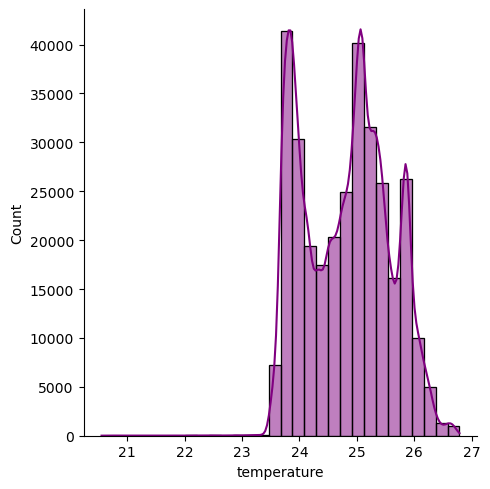

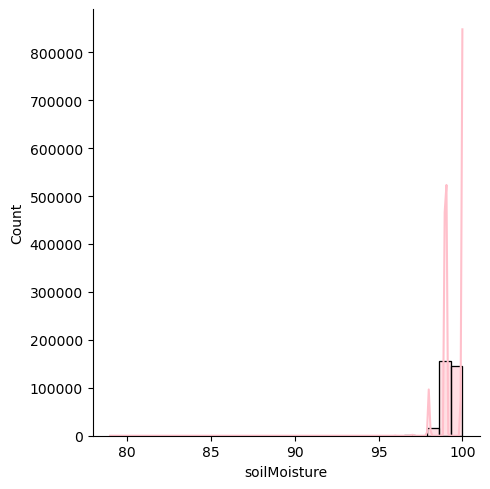

In [5]:
plt.figure(figsize=(10,6))
sns.heatmap(df[['temperature', 'soilMoisture']].corr(), annot=True, cmap='coolwarm')
plt.show()
plt.figure(figsize=(10,6))
sns.displot(df['temperature'], bins=30, kde=True, color='purple')
sns.displot(df['soilMoisture'], bins=30, kde=True, color='pink')
plt.show()



In [6]:
df.set_index('time', inplace=True)
df.head()

,temperature,soilMoisture
time,,
2025-11-12 09:08:00.248704936+00:00,23.008131,99
2025-11-12 09:08:02.764720638+00:00,23.008141,99
2025-11-12 09:08:07.681226269+00:00,23.035870,100
2025-11-12 09:08:12.481963698+00:00,23.058266,99
2025-11-12 09:08:17.397625407+00:00,23.055740,100


In [7]:
df.describe()

,temperature,soilMoisture
count,318565.000000,318565.000000
mean,24.813514,99.399981
std,0.753247,0.605083
min,20.553129,79.000000
25%,24.090002,99.000000
50%,24.903046,99.000000
75%,25.374757,100.000000
max,26.788774,100.000000


In [9]:
df.index = pd.to_datetime(df.index)


In [10]:
df.index

DatetimeIndex(['2025-11-12 09:08:00.248704936+00:00',
               '2025-11-12 09:08:02.764720638+00:00',
               '2025-11-12 09:08:07.681226269+00:00',
               '2025-11-12 09:08:12.481963698+00:00',
               '2025-11-12 09:08:17.397625407+00:00',
               '2025-11-12 09:08:22.087914111+00:00',
               '2025-11-12 09:08:24.273661543+00:00',
               '2025-11-12 09:08:26.895821718+00:00',
               '2025-11-12 09:08:29.223980499+00:00',
               '2025-11-12 09:08:31.700356068+00:00',
               ...
               '2025-11-25 10:39:06.921174114+00:00',
               '2025-11-25 10:39:11.715189453+00:00',
               '2025-11-25 10:39:16.531205342+00:00',
               '2025-11-25 10:39:21.426286968+00:00',
               '2025-11-25 10:39:23.626132864+00:00',
               '2025-11-25 10:39:26.230529350+00:00',
               '2025-11-25 10:39:30.931017320+00:00',
               '2025-11-25 10:39:35.735291136+00:00',
         

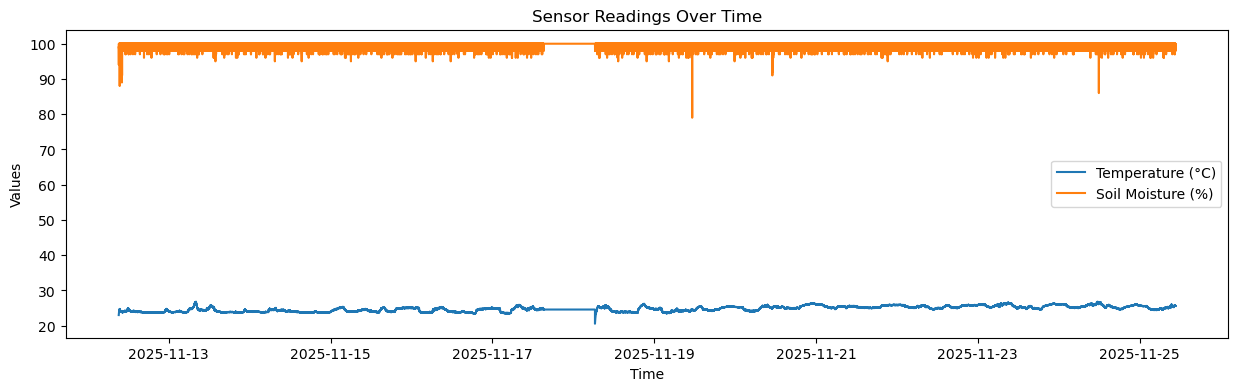

In [11]:
plt.figure(figsize=(15, 4))
plt.plot(df.index, df['temperature'], label='Temperature (°C)')
plt.plot(df.index, df['soilMoisture'], label='Soil Moisture (%)')
plt.gca().set(title='Sensor Readings Over Time', xlabel='Time', ylabel='Values')
plt.legend()
plt.show()


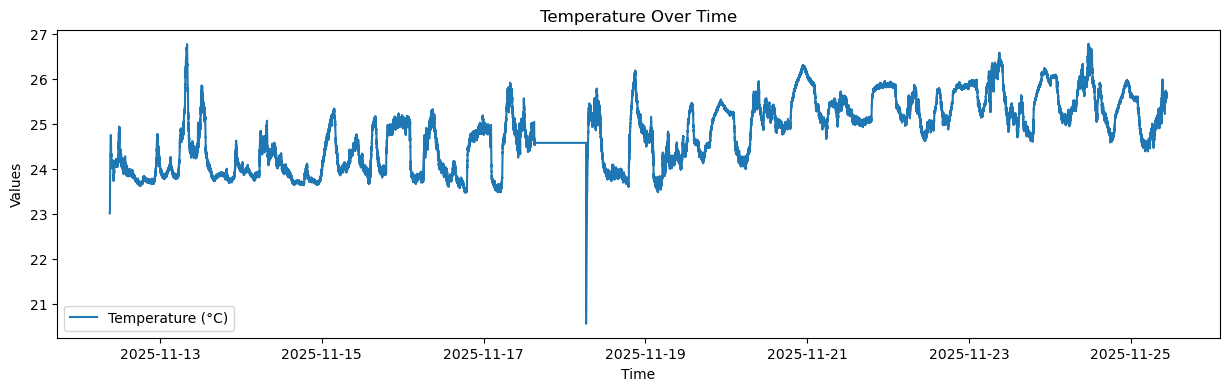

In [13]:
plt.figure(figsize=(15, 4))
plt.plot(df.index, df['temperature'], label='Temperature (°C)')
plt.gca().set(title='Temperature Over Time', xlabel='Time', ylabel='Values')
plt.legend()
plt.show()


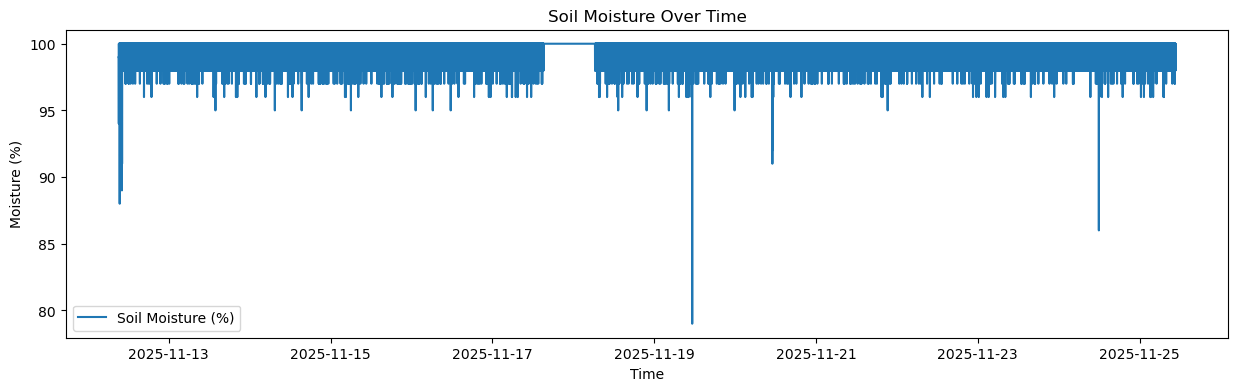

In [14]:
plt.figure(figsize=(15, 4))
plt.plot(df.index, df['soilMoisture'], label='Soil Moisture (%)')
plt.gca().set(title='Soil Moisture Over Time', xlabel='Time', ylabel='Moisture (%)')
plt.legend()
plt.show()


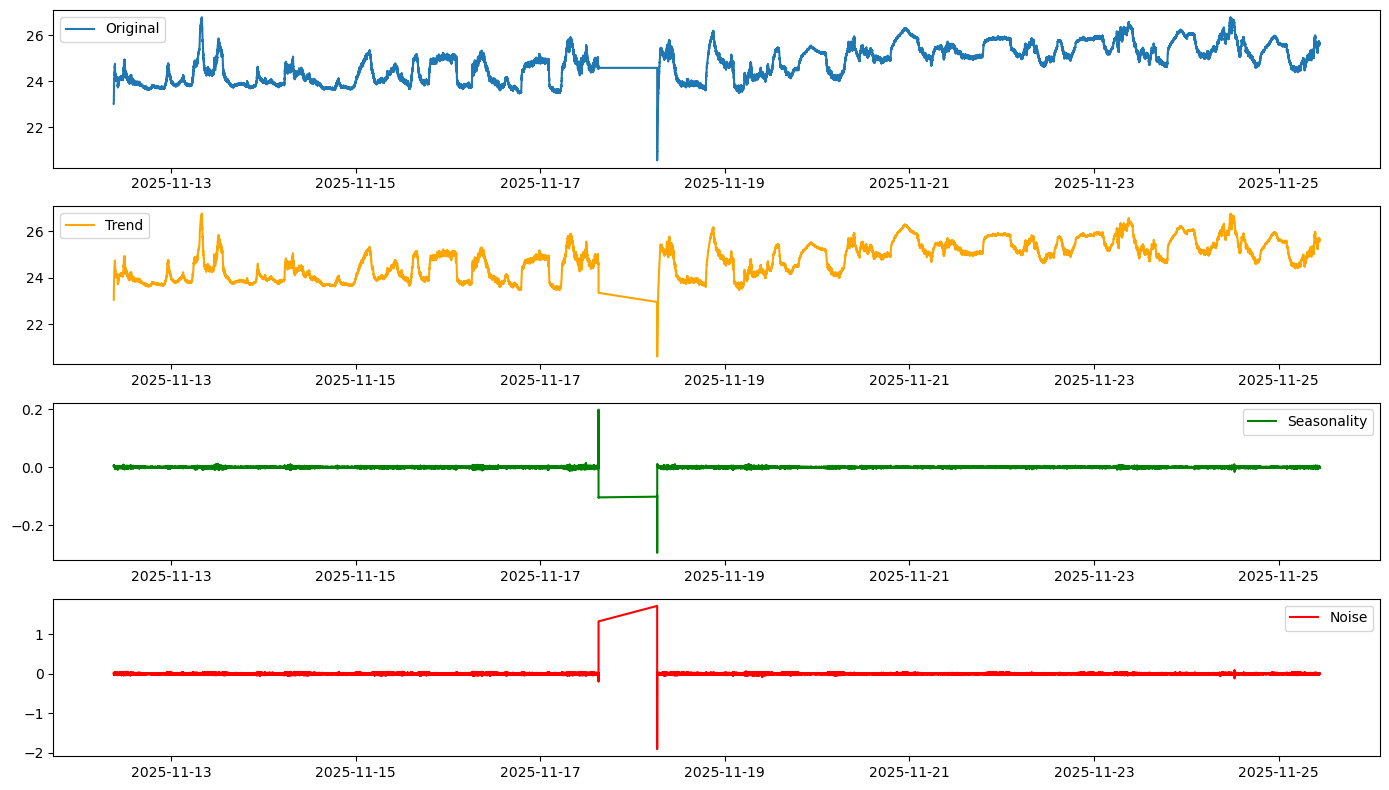

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

# Ensure datetime index
df.index = pd.to_datetime(df.index)

# Choose the column to decompose
y = df['temperature']

# Trend (simple moving average)
trend = y.rolling(window=10, center=True).mean()

# Seasonality = signal - trend (after removing NA)
seasonality = (y - trend).rolling(window=20, center=True).mean()

# Noise = remainder
noise = y - trend - seasonality

plt.figure(figsize=(14,8))

plt.subplot(4,1,1)
plt.plot(y, label='Original')
plt.legend()

plt.subplot(4,1,2)
plt.plot(trend, label='Trend', color='orange')
plt.legend()

plt.subplot(4,1,3)
plt.plot(seasonality, label='Seasonality', color='green')
plt.legend()

plt.subplot(4,1,4)
plt.plot(noise, label='Noise', color='red')
plt.legend()

plt.tight_layout()
plt.show()


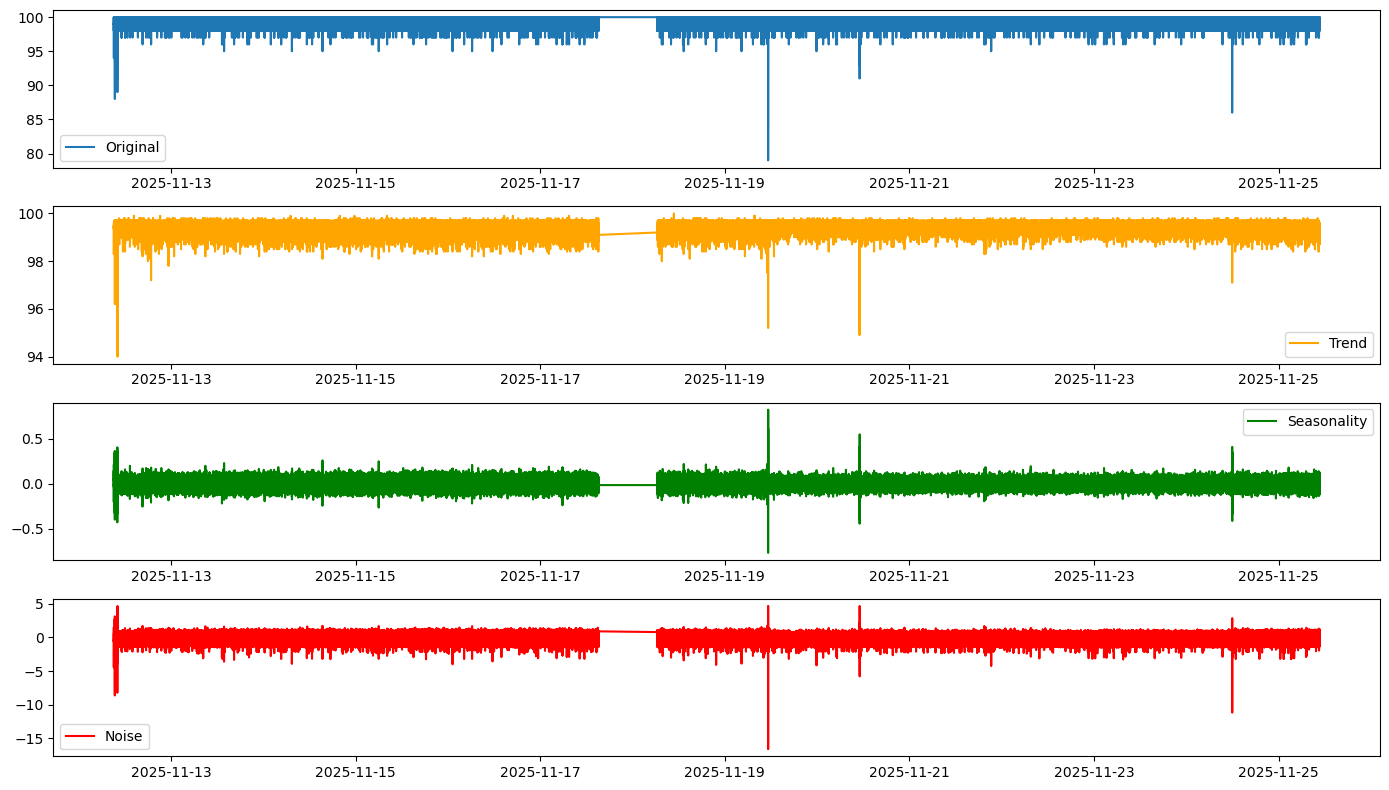

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

# Ensure datetime index
df.index = pd.to_datetime(df.index)

# Choose the column to decompose
y = df['soilMoisture']

# Trend (simple moving average)
trend = y.rolling(window=10, center=True).mean()

# Seasonality = signal - trend (after removing NA)
seasonality = (y - trend).rolling(window=20, center=True).mean()

# Noise = remainder
noise = y - trend - seasonality

plt.figure(figsize=(14,8))

plt.subplot(4,1,1)
plt.plot(y, label='Original')
plt.legend()

plt.subplot(4,1,2)
plt.plot(trend, label='Trend', color='orange')
plt.legend()

plt.subplot(4,1,3)
plt.plot(seasonality, label='Seasonality', color='green')
plt.legend()

plt.subplot(4,1,4)
plt.plot(noise, label='Noise', color='red')
plt.legend()

plt.tight_layout()
plt.show()


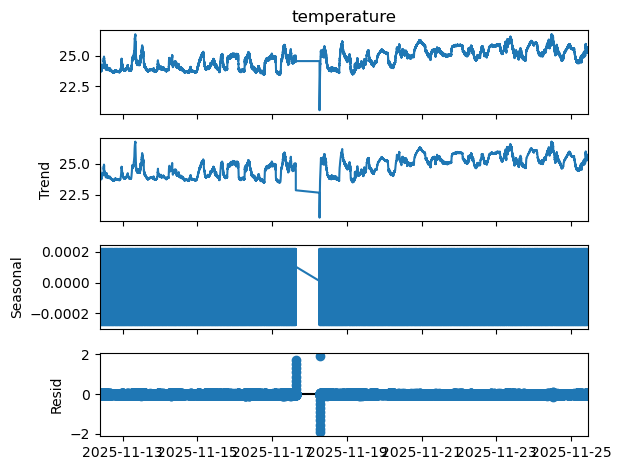

In [18]:
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(df['temperature'], model='additive', period=20)

result.plot()
plt.show()


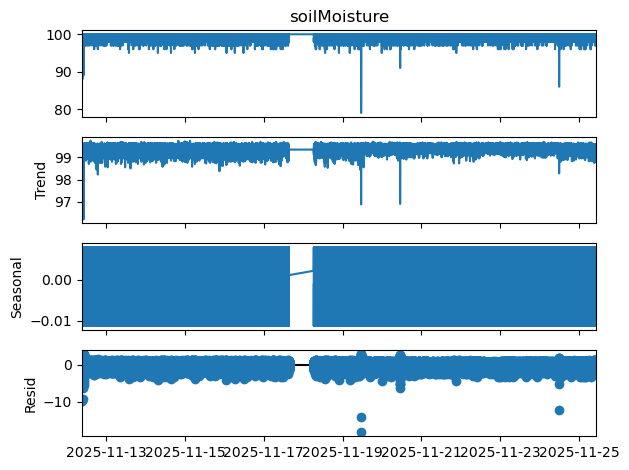

In [19]:
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(df['soilMoisture'], model='additive', period=20)

result.plot()
plt.show()


In [20]:
#ARIMA
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn import linear_model

import pmdarima as pm
from pmdarima.model_selection import train_test_split

from pandas import to_datetime

import itertools
import warnings

import datetime
from datetime import datetime
warnings.filterwarnings('ignore')

In [25]:
X_train = df[df.index < '2025-11-23 01:45:50']["temperature"]
X_valid  = df[df.index >= '2025-11-23 01:45:50']["temperature"]
y = df['temperature']

print('X_train Shape', X_train.shape)
print('X_Valid Shape', X_valid.shape)

X_train Shape (256631,)
X_Valid Shape (61934,)


In [26]:
model = ARIMA(X_train, order=(2,1,2))   # p, d, q
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:            temperature   No. Observations:               256631
Model:                 ARIMA(2, 1, 2)   Log Likelihood              749358.984
Date:                Wed, 26 Nov 2025   AIC                       -1498707.967
Time:                        09:12:29   BIC                       -1498655.690
Sample:                             0   HQIC                      -1498692.746
                             - 256631                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1269      0.015      8.676      0.000       0.098       0.156
ar.L2         -0.2874      0.006    -46.460      0.000      -0.300      -0.275
ma.L1         -0.1932      0.015    -13.204      0.0

In [27]:
n = len(X_valid)
forecast = model_fit.forecast(steps=n)
print(forecast)


256631    25.916141
256632    25.916467
256633    25.916386
256634    25.916282
256635    25.916292
            ...    
318560    25.916316
318561    25.916316
318562    25.916316
318563    25.916316
318564    25.916316
Name: predicted_mean, Length: 61934, dtype: float64


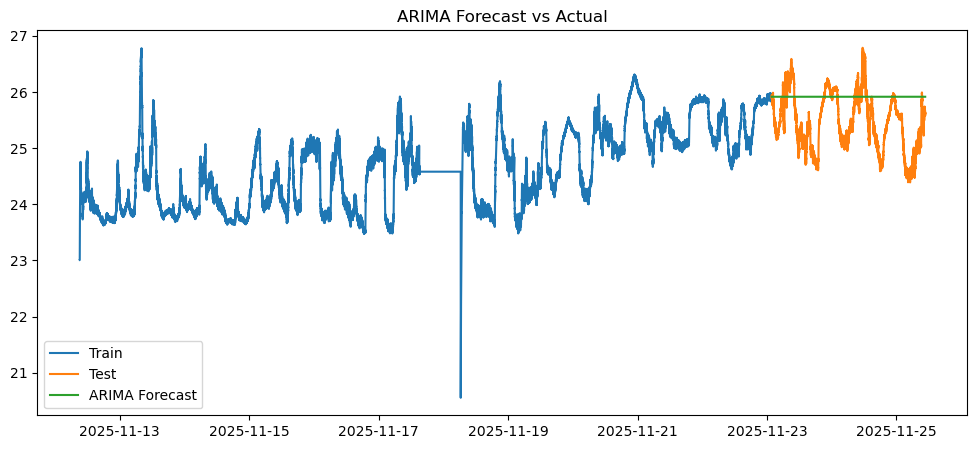

In [28]:
train = X_train
test = X_valid

plt.figure(figsize=(12,5))
plt.plot(train.index, train, label='Train')
plt.plot(test.index, test, label='Test')
plt.plot(test.index, forecast, label='ARIMA Forecast')
plt.legend()
plt.title("ARIMA Forecast vs Actual")
plt.show()
